In [16]:
%run ./config.ipynb

In [17]:
cortex = Cortex.client()

In [18]:
train_ds = cortex.dataset('kaggle/ames-housing-train')

In [19]:
pipeline = train_ds.pipeline('clean', clear_cache=True)
pipeline.reset()

In [20]:
def drop_unused(pipeline, df):
    df.drop(columns=['Id'], axis=1, inplace=True)

pipeline.add_step(drop_unused)

In [21]:
def drop_outliers(pipeline, df):
    df.drop(df[(df['GrLivArea'].astype(int)>4000) & (df['SalePrice'].astype(int)<300000)].index, inplace=True)
    
pipeline.add_step(drop_outliers)

In [22]:
def fill_zero_cols(pipeline, df):
    fill_zero_cols = ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'GarageCars']
    [df[i].fillna(0, inplace=True) for i in fill_zero_cols]

pipeline.add_step(fill_zero_cols)

In [23]:
def fill_median_cols(pipeline, df):
    fill_median_cols = ['GarageArea','TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'BsmtUnfSF', 'GarageYrBlt']
    [df[j].fillna(df[j].astype(float).median(), inplace=True) for j in fill_median_cols]
    
pipeline.add_step(fill_median_cols)

In [24]:
def fill_na_none(pipeline, df):
    df.fillna('none', inplace=True)

pipeline.add_step(fill_na_none)

In [25]:
train_df = pipeline.run()

running pipeline [clean] for dataset [kaggle/ames-housing-train]:
> drop_unused 
> drop_outliers 
> fill_zero_cols 
> fill_median_cols 
> fill_na_none 


In [13]:
viz = train_ds.visuals(train_df, figsize=(18, 9))

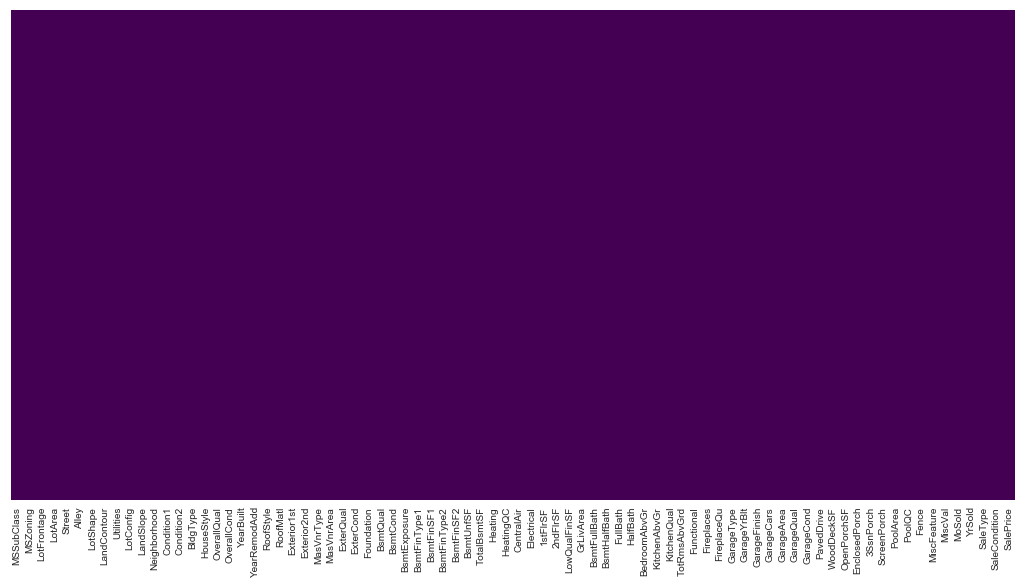

<Figure size 1296x648 with 0 Axes>

In [14]:
viz.show_missing()

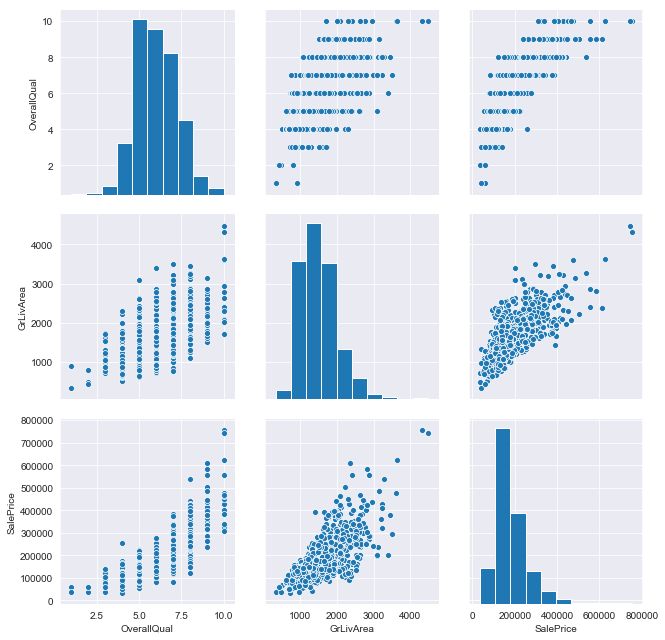

<Figure size 1296x648 with 0 Axes>

In [15]:
viz.show_corr_pairs('SalePrice', threshold=0.7)